# <p style="text-align:center" color="black"><span style="color:black">Technical Analysis of AAPL Stocks </span></p>


## install necessary packages

In [13]:
conda install -c conda-forge ta-lib

     ------------------------------------ 272.0/272.0 kB 577.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build Ta-Lib


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [20 lines of output]
  <string>:77: UserWarning: Cannot find ta-lib library, installation may fail.
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\talib
  copying talib\abstract.py -> build\lib.win-amd64-cpython-39\talib
  copying talib\deprecated.py -> build\lib.win-amd64-cpython-39\talib
  copying talib\stream.py -> build\lib.win-amd64-cpython-39\talib
  copying talib\test_abstract.py -> build\lib.win-amd64-cpython-39\talib
  copying talib\test_data.py -> build\lib.win-amd64-cpython-39\talib
  copying talib\test_func.py -> build\lib.win-amd64-cpython-39\talib
  copying talib\test_pandas.py -> build\lib.win-amd64-cpython-39\talib
  copying talib\test_polars.py -> build\lib.win-amd64-cpython-39\talib
  copying talib\test_stream.py -> build\lib.win-amd64-cpython-39\talib
  copying talib\__init__.py -> build\lib.win-am

## <p color="red"><span style="color:black">Introduction</span></p>

> - In this project, we will be using **Python** and **machine learning algorithms** to perform **time series analysis and forecasting** on the **stock prices of Apple Inc**. (AAPL). 


Time series analysis and forecasting can be a useful tool for predicting future values of a series based on its past values. In the context of stock prices, this can be useful for making investment decisions or for understanding market trends. There are a variety of different techniques that can be used for time series analysis and forecasting, including:

> - Simple moving average: This method involves calculating the average value of a series over a certain number of time periods and using that average value as a prediction for the next time period.

> - Exponential smoothing: This method involves giving more weight to recent observations and less weight to observations further in the past. This can be useful for dealing with data that exhibits trend or seasonality.

> - Autoregressive integrated moving average (ARIMA): This method involves fitting an autoregressive model to the data, which can capture trends and seasonality, and using that model to make predictions.

> - Long short-term memory (LSTM) networks: These are a type of recurrent neural network that can be useful for forecasting time series data.

To perform time series analysis and forecasting using Python, we can use libraries such as NumPy, pandas, and scikit-learn. We can also use specialized libraries such as **statsmodels** for more advanced techniques like ARIMA. It's important to carefully evaluate the performance of our models using appropriate metrics and to consider the specific characteristics of the time series data we are working with.

### <p color="red"><span style="color:Orange">1- Importing the necessary libraries for EDA</span></p>

In [3]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')
    
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <p color="red"><span style="color:Orange">2- Reading the Data</span></p>

In [58]:
df = pd.read_csv('AAPL_Daily.csv')
df['Date']= pd.to_datetime(df['Date']) # Convert the data type of the Date column to datetime.
df.set_index('Date', inplace=True) # Definition of the dataframe index as a Date column.
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-11-11,0.281071,0.283750,0.270000,0.270714,0.230761,152975200
2002-11-12,0.273571,0.286429,0.272857,0.279286,0.238068,223792800
2002-11-13,0.276786,0.286964,0.272857,0.278393,0.237307,231739200
2002-11-14,0.283929,0.293036,0.281786,0.291071,0.248114,141713600
2002-11-15,0.289821,0.290000,0.281429,0.284821,0.242787,160994400


### <p color="red"><span style="color:Orange">3- Exploratory Data Analysis - EDA</span></p>

<div >
<b>Exploratory data analysis (EDA)</b> for time series data involves many of the same techniques as EDA for other types of data, with some additional considerations. Here are some specific techniques that can be useful for EDA of time series data:

Line plots: Plotting the time series data as a line plot can help you visualize the overall trend and any patterns or seasonality.

- Autocorrelation plots: These plots can help you understand the relationship between a time series and its lagged values. High autocorrelation at a particular lag indicates a strong relationship between the value at that lag and the current value.

- Seasonal decomposition: This involves breaking down the time series into its trend, seasonal, and residual components. This can help you understand the underlying patterns in the data and identify any seasonality.

- Stationarity tests: Time series data is said to be stationary if the statistical properties (mean, variance, etc.) of the data do not change over time. Testing for stationarity can be useful for identifying trends and seasonality in the data and choosing appropriate modeling techniques.

It's important to keep in mind that EDA is an iterative process, and you may need to go back and perform additional analysis as you gain a deeper understanding of the data.</p>
</div>

<div>
<b>Data visualization</b> is the process of creating charts, graphs, and other types of visual representations of data. It is a powerful tool for understanding and communicating data, as it allows you to see patterns and trends that might not be immediately apparent from looking at raw data.

There are many different types of visualizations that you can use, depending on the nature of the data and the message you want to convey. Some common types of visualizations include:

- Line plots: These are used to show how a numerical value changes over time.

- Bar charts: These are used to compare the sizes of different categories.

- Histograms: These show the distribution of a numerical variable by dividing the range of values into bins and showing the frequency of observations in each bin.

- Scatter plots: These show the relationship between two numerical variables by plotting them on a graph with one variable on the x-axis and the other on the y-axis.

- Box plots: These show the distribution of a numerical variable by showing the minimum, first quartile, median, third quartile, and maximum value.

There are many tools and libraries available for creating data visualizations, including matplotlib, seaborn, and plotly. It's important to choose the right visualization for the data and the message you want to convey, and to design the visualization in a way that is clear and effective.
</div>

In [5]:
df.shape

(5034, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2002-11-11 to 2022-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,33.332524,33.706810,32.963526,33.348803,31.996992,4.192704e+08
std,43.760277,44.300347,43.240857,43.790586,43.729989,3.916717e+08
min,0.231964,0.235536,0.227143,0.234286,0.199710,3.934000e+07
25%,3.913660,3.965447,3.816875,3.912411,3.335009,1.316015e+08
50%,17.951607,18.116428,17.805893,17.926251,15.614528,2.893672e+08
75%,39.865625,40.183126,39.518124,39.933124,37.870130,5.838686e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,3.372970e+09


#### <p color="red"><span style="color:Lime">- Data visualization - Line Chart</span></p>

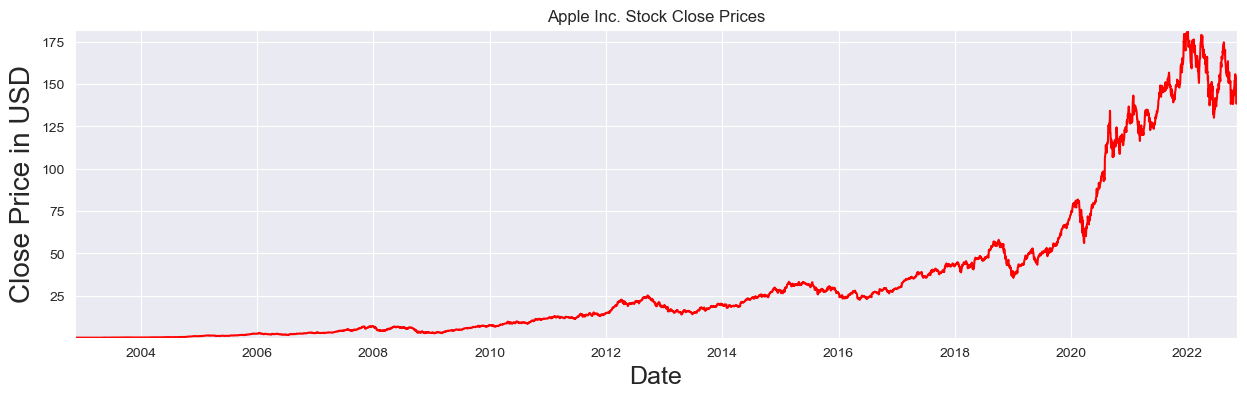

In [12]:

# Create a line plot of the 'Close' column using seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(15,4))
plt.title('Apple Inc. Stock Close Prices')
sns.lineplot(data=df, x=df.index, y='Close', color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in USD',fontsize=20)
plt.xlim(df.index[0], df.index[-1])
plt.ylim(df['Close'].min(), df['Close'].max())
plt.show()

In [28]:
import plotly.express as px

# Create a line plot of the 'Close' column using plotly
fig = px.line(df, x=df.index, y='Close', title='Apple Inc. Stock Close Prices')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close Price in USD')
fig.show()

#### <p color="red"><span style="color:lime">2- Data visualization - Bar Plot</span></p>

In [29]:
df['year'] = df.index.year 
df_year = df[['Close','year']].groupby(by='year').sum().reset_index()

In [30]:
df_year.head(3)

,year,Close
0,2002,9.446249
1,2003,83.451429
2,2004,159.871251


In [17]:
fig = px.bar(df, x='year', y='Close', title='Stock Prices by Year', color='year')
fig.show()


### <p color="red"><span style="color:lime">- Data visualization using K-line chart</span></p>

A K-line chart, also known as a K-chart or a candlestick chart, is a type of financial chart that is used to display the price movements of a security, currency, or other asset. K-line charts are commonly used to visualize the price action of stocks, futures, and other financial instruments.

K-line charts are made up of a series of "candlesticks," which are rectangular bars that show the open, high, low, and close prices for a given time period. The top of the candlestick represents the highest price that the asset reached during the time period, while the bottom represents the lowest price. The open price is represented by a horizontal line on the left side of the candlestick, and the close price is represented by a horizontal line on the right side. If the close price is higher than the open price, the candlestick is typically colored green or white, indicating that the price increased during the time period. If the close price is lower than the open price, the candlestick is typically colored red or black, indicating that the price decreased during the time period.

K-line charts can provide useful information about the price action of an asset, including the direction of the trend, the level of volatility, and the strength of buying or selling pressure. They are often used by technical analysts to identify patterns and make trading decisions.

</div>

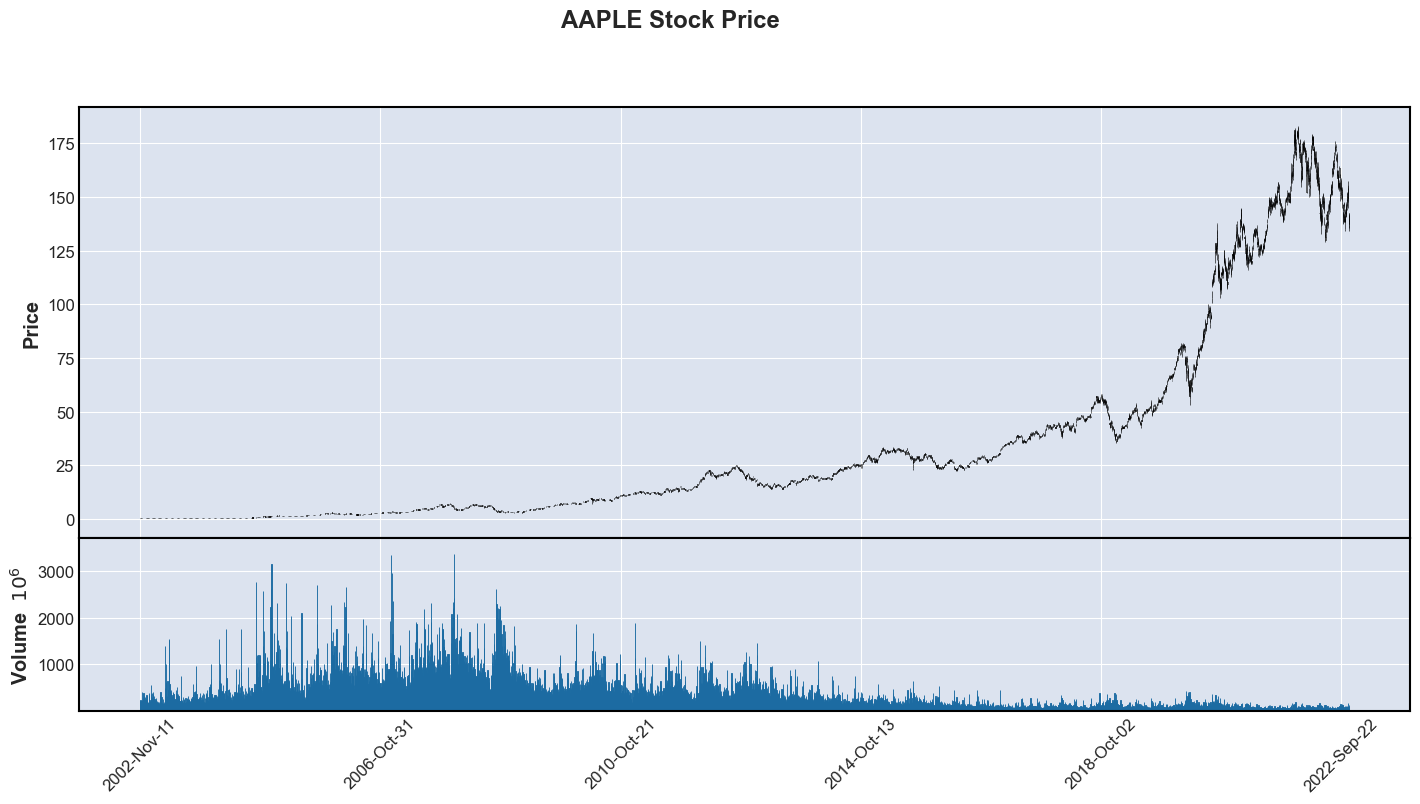

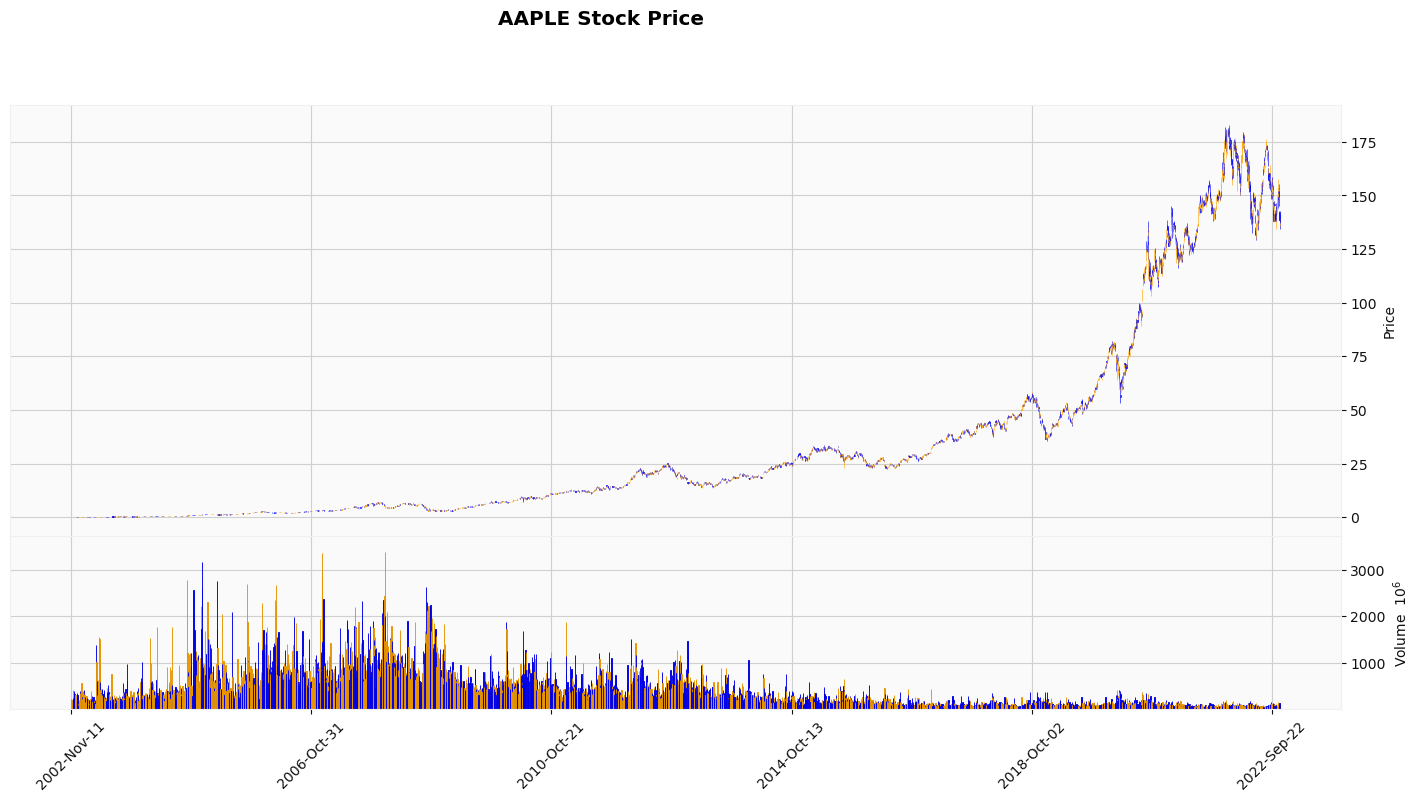

In [36]:
# Increase the size of the chart and change the title
k_plot = mpf.plot(df, type='candle', volume=True, figratio=(30,14), figscale=1.5, title='AAPLE Stock Price',)

# Change the colors of the candlesticks to blue and orange
mc = mpf.make_marketcolors(up='orange', down='blue', inherit=True)
exterior = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
k_plot = mpf.plot(df, style=exterior, type='candle', volume=True, figratio=(30,14), figscale=1.5, title='AAPLE Stock Price',)

In order to better visualize the evolution of the AAPL data, we will use a K-line chart with a smaller time interval to reduce the amount of data and improve clarity.

Let's take for example the stock market data from 2017 to 2020

In [41]:
sample_df = pd.DataFrame(df, index = pd.date_range("2020-11-01", "2020-12-31")) # time interval reduction
sample_df

,Open,High,Low,Close,Adj Close,Volume,year
2020-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-02,109.110001,110.680000,107.320000,108.769997,107.294662,122866900.0,2020.0
2020-11-03,109.660004,111.489998,108.730003,110.440002,108.942009,107624400.0,2020.0
2020-11-04,114.139999,115.589996,112.349998,114.949997,113.390839,138235500.0,2020.0
2020-11-05,117.949997,119.620003,116.870003,119.029999,117.415497,126387100.0,2020.0
...,...,...,...,...,...,...,...
2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.068604,124486200.0,2020.0
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.270172,121047300.0,2020.0
2020-12-30,135.580002,135.990005,133.399994,133.720001,132.133835,96452100.0,2020.0


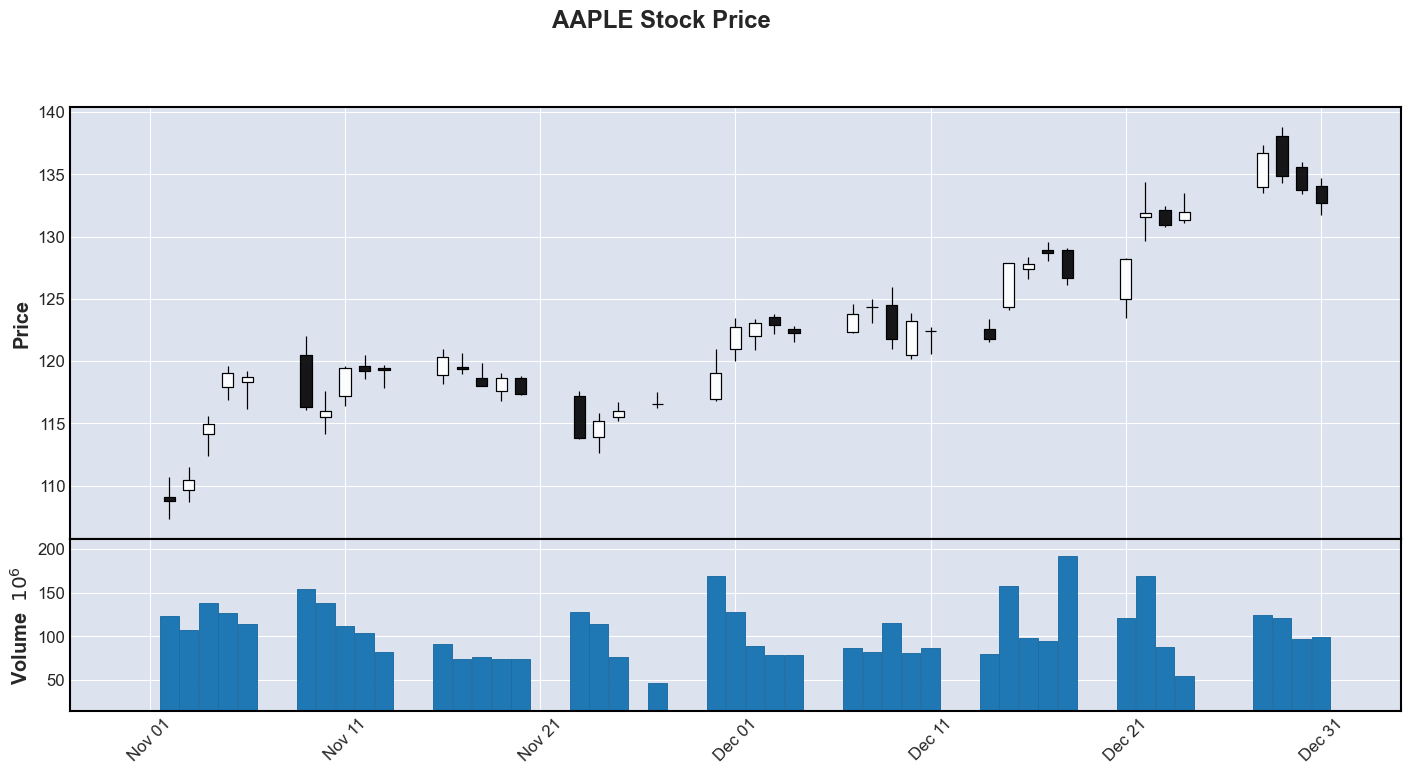

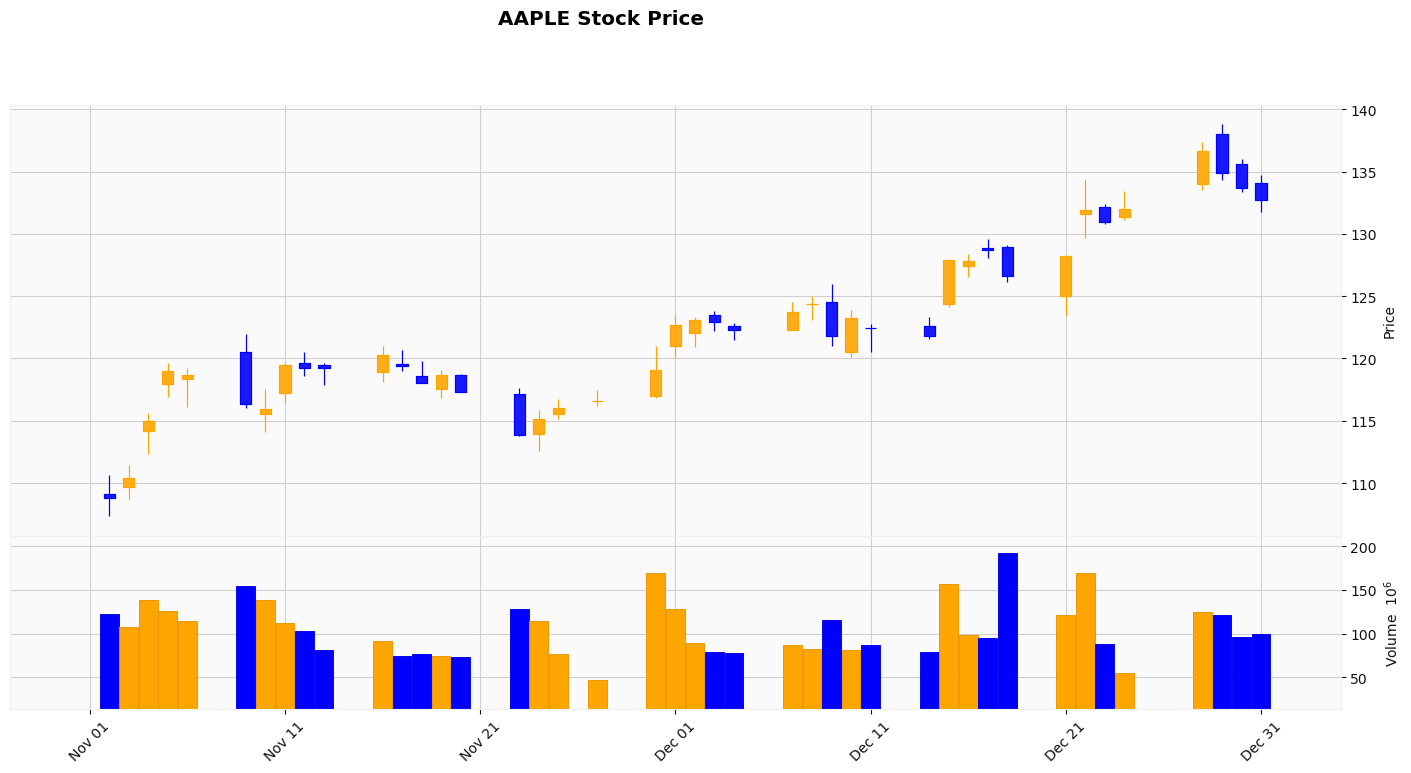

In [42]:
# Increase the size of the chart and change the title
k_plot = mpf.plot(sample_df, type='candle', volume=True, figratio=(30,14), figscale=1.5, title='AAPLE Stock Price',)

# Change the colors of the candlesticks to blue and orange
mc = mpf.make_marketcolors(up='orange', down='blue', inherit=True)
exterior = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
k_plot = mpf.plot(sample_df, style=exterior, type='candle', volume=True, figratio=(30,14), figscale=1.5, title='AAPLE Stock Price',)

> In the stock market, the "close" refers to the final price at which a stock is traded on a particular day. The close price is an important indicator of market sentiment and can be affected by a variety of factors, including news events, economic data, and the performance of other stocks in the same industry or market sector. If you are looking at the close price of a particular stock (such as Apple) over time, you may see it fluctuate based on these and other factors. It is important to note that the stock market can be volatile and past performance is not necessarily indicative of future performance. It is always a good idea to do your own research and carefully consider your investment decisions before buying or selling any stocks.

### <p color="red"><span style="color:Orange">4- Forecasting using LSTM</span></p>

<b>Long Short-Term Memory (LSTM)</b> is a type of recurrent neural network (RNN) that is commonly used in natural language processing (NLP) and other applications where modeling long-term dependencies is important. An LSTM network is a type of artificial neural network that is designed to remember patterns over long periods of time, making it particularly well-suited for time series data.

An LSTM network consists of a series of "cells" that are connected through layers. Each cell takes in an input and produces an output, and the output of one cell is used as the input to the next cell. The cells also have "gates" that can control the flow of information into and out of the cell, allowing the network to selectively remember or forget certain patterns. This ability to selectively remember or forget information makes LSTM networks particularly effective at modeling long-term dependencies and predicting future outcomes based on past data.

LSTM networks have been widely used in various NLP tasks, such as language translation, text classification, and sentiment analysis, as well as in other areas, such as stock market prediction and music generation.

### <p color="red"><span style="color:lime">- Importing the necessary libraries for LSTM & TA-Lib</span></p>

Install Keras, tensorflow and pandas_datareader

In [31]:
%%capture
!pip install mplfinance
!pip install pandas_datareader

In [32]:
!pip install keras

In [33]:
!pip install tensorflow

In [34]:
%%capture

import warnings
warnings.filterwarnings("ignore")

# Data analysis and processing
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import datetime #Time Processing Suite
import talib
import mplfinance as mpf

# WebCrawler
import pandas_datareader.data as web

# Data normalization 
from sklearn.preprocessing import MinMaxScaler  


# Keras & sklearn imports
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import EarlyStopping


from math import sqrt
from keras.utils.vis_utils import plot_model   # plot_model 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### <p color="red"><span style="color:lime">- Ta-Lib</span></p>

In [59]:
# Parameter setting: timeperiod: the number of days parameter, you can freely set the number of days, the default is 14
_adx = talib.ADX(df.High, df.Low, df.Close, timeperiod = 14)
_rsi = talib.RSI(df.Close,  timeperiod = 14)
_dema = talib.DEMA(df.Close, timeperiod=30)

- **`talib library`** TA-Lib (Technical Analysis Library) is an open-source software library that provides a collection of technical analysis indicators and tools for financial market analysis. It was developed by Todd Rudefined and is widely used in the financial industry and by financial analysts and traders to analyze financial data and make informed trading decisions.. 

- The **`ADX function`** The Average Directional Index (ADX) is a technical analysis indicator that is used to measure the strength of a trend, it is calculated using a formula that combines the +DI and -DI values, which are based on the difference between the current high and low prices and the previous high and low prices. The ADX value is a smoothed average of the +DI and -DI values, with higher values indicating a stronger trend and lower values indicating a weaker trend.

- The **`RSI function`** is a technical analysis indicator that measures the strength of a trend. It was developed by Welles Wilder and is commonly used to identify overbought and oversold conditions in a market. The RSI is calculated using a formula that compares the average gain and the average loss over a given time period. The RSI value is a normalized number between 0 and 100, with higher values indicating that the asset has been gaining strength and lower values indicating that it has been losing strength.

- The **`DEMA function`** is a technical analysis indicator that is used to smooth price data and reduce the impact of noise or volatility on the chart. It is a type of moving average that uses a formula to double-smooth the data, resulting in a line that is more responsive to changes in the data compared to a simple moving average. 


1- Study _adx:


*ADX above 30 means the price has entered a trend*

*And below 30 means that the exchange rate is fluctuating within the range.* 

*When the ADX exceeds 30, the larger the reading of the ADX, the more pronounced the price trend.*

In [60]:
_adx

Date
2002-11-11          NaN
2002-11-12          NaN
2002-11-13          NaN
2002-11-14          NaN
2002-11-15          NaN
                ...    
2022-11-02    18.042667
2022-11-03    18.315415
2022-11-04    19.179114
2022-11-07    19.981119
2022-11-08    20.147657
Length: 5034, dtype: float64

2- RSI

Relative Strength Index (RSI), RSI = (average up/(average up + average down)) x 100

The value calculated from the average increase and average decrease of a stock price, 

which is an indicator of the strength or weakness of a stock price during the observation period.

In [45]:

_rsi 

Date
2002-11-11          NaN
2002-11-12          NaN
2002-11-13          NaN
2002-11-14          NaN
2002-11-15          NaN
                ...    
2022-11-02    46.576802
2022-11-03    40.800299
2022-11-04    40.362023
2022-11-07    41.097922
2022-11-08    41.926812
Length: 5034, dtype: float64

3- EMA:

Double Exponential Moving Average (DEMA), DEMA = 2 * N-Day EMA - EMA of N-Day EMA 

In [61]:
_dema 

Date
2002-11-11           NaN
2002-11-12           NaN
2002-11-13           NaN
2002-11-14           NaN
2002-11-15           NaN
                 ...    
2022-11-02    146.005309
2022-11-03    144.981899
2022-11-04    143.998449
2022-11-07    143.181845
2022-11-08    142.521897
Length: 5034, dtype: float64

### <p color="red"><span style="color:lime">- Data Processing</span></p>

In [62]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-11-11,0.281071,0.283750,0.270000,0.270714,0.230761,152975200
2002-11-12,0.273571,0.286429,0.272857,0.279286,0.238068,223792800
2002-11-13,0.276786,0.286964,0.272857,0.278393,0.237307,231739200
2002-11-14,0.283929,0.293036,0.281786,0.291071,0.248114,141713600
2002-11-15,0.289821,0.290000,0.281429,0.284821,0.242787,160994400


Let's drop all columns except Close column

In [64]:
df.drop(['Open', 'High', 'Low', 'Volume','Adj Close'], axis=1, inplace=True) 
df.head()

,Close
Date,
2002-11-11,0.270714
2002-11-12,0.279286
2002-11-13,0.278393
2002-11-14,0.291071
2002-11-15,0.284821


Let's split data into train and test data

In [66]:
split_line = int(len(df)*0.8) 
train_df = df.iloc[:split_point].copy()
test_df = df.iloc[split_point:].copy()

Train-test split is a common technique used in machine learning to evaluate the performance of a model. It involves dividing a dataset into two subsets: a training set and a test set. The training set is used to train the model, while the test set is used to evaluate the model's performance.

In the 80/20 split, the dataset is split into two subsets such that 80% of the data is used for training and 20% is used for testing. This is a common split ratio, but it can vary depending on the specific needs of the problem at hand.

In [67]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_set= train.values.reshape(-1,1)
train_sc = scaler.fit_transform(train_set)
test_set= test.values.reshape(-1,1)
test_sc = scaler.fit_transform(test_set)

This code is normalizing the training and testing data: 

<div>
 
<b><code>Normalization</code></b> is the process of scaling a variable to have a values between 0 and 1. It is a common preprocessing step in machine learning, particularly when working with data that has a skewed distribution or differs in scale. There are several ways to normalize a variable, but the most common method is to subtract the minimum value of the variable from each data point and then divide the result by the range of the variable (i.e., the difference between the maximum and minimum values).</b>
</div>

In [69]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [70]:
X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4026, 1, 1) (4026, 1) (1006, 1, 1) (1006, 1)


### <p color="red"><span style="color:lime">- It's time to build our model</span></p>

* epochs (iterations): This is the number of times that the model will be trained on the training data. During each epoch, the model will see all of the training data, and the weights and biases of the model will be updated based on the error between the model's predictions and the true labels. Increasing the number of epochs can sometimes improve the model's performance, but it can also lead to overfitting if the model is trained for too many epochs.

* batch_size: This is the number of samples that will be processed by the model in each iteration of the training process. A smaller batch size can be useful for training on smaller datasets or when the data is noisy, as it allows the model to update its weights and biases more frequently. A larger batch size can be more efficient, but it can also make the model more sensitive to noise in the data.

* verbose (progress bar mode): This is an optional parameter that determines how much information is displayed during the training process. If verbose is set to 0, no progress bar will be displayed. If verbose is set to 1, a progress bar will be displayed that shows the progress of each epoch. If verbose is set to 2, a progress bar will be displayed that shows the progress of each batch.

* callbacks (callback function): This is a list of functions that will be called at specific points during the training process. Callbacks can be used to implement a variety of behaviors, such as saving the model at regular intervals, early stopping, and learning rate scheduling. You can find more information about callbacks here.

Overall, these parameters can be adjusted to optimize the performance of the model and fine-tune its behavior during the training process.

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [80]:
# Preprocess the data by scaling it to the range [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

# Split the data into training and test sets
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Build LSTM model
model = Sequential()

# Add LSTM layer with 50 units and input shape of (X_train.shape[1], 1)
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Add Dropout layer with forgetting rate of 0.2
model.add(Dropout(0.2))

# Add output layer with a single output value
model.add(Dense(1))

# Compile model with mean squared error loss, Adam optimizer, and accuracy metric
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Use EarlyStopping callback to stop training if loss does not improve after 2 epochs
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

# Fit model to training data for 20 epochs with batch size of 1
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2, shuffle=True, callbacks=[early_stop])


Epoch 1/20
4026/4026 - 14s - loss: 0.0144 - accuracy: 2.4839e-04 - 14s/epoch - 4ms/step
Epoch 2/20
4026/4026 - 10s - loss: 0.0023 - accuracy: 2.4839e-04 - 10s/epoch - 3ms/step
Epoch 3/20
4026/4026 - 10s - loss: 0.0019 - accuracy: 2.4839e-04 - 10s/epoch - 3ms/step
Epoch 4/20
4026/4026 - 10s - loss: 0.0018 - accuracy: 2.4839e-04 - 10s/epoch - 3ms/step
Epoch 5/20
4026/4026 - 10s - loss: 0.0017 - accuracy: 2.4839e-04 - 10s/epoch - 3ms/step
Epoch 6/20
4026/4026 - 10s - loss: 0.0015 - accuracy: 2.4839e-04 - 10s/epoch - 2ms/step
Epoch 7/20
4026/4026 - 11s - loss: 0.0016 - accuracy: 2.4839e-04 - 11s/epoch - 3ms/step
Epoch 8/20
4026/4026 - 10s - loss: 0.0014 - accuracy: 2.4839e-04 - 10s/epoch - 3ms/step
Epoch 9/20
4026/4026 - 10s - loss: 0.0016 - accuracy: 2.4839e-04 - 10s/epoch - 2ms/step
Epoch 10/20
4026/4026 - 10s - loss: 0.0015 - accuracy: 2.4839e-04 - 10s/epoch - 3ms/step
Epoch 10: early stopping


> - This code is building and training a machine learning model using the Sequential class from the tensorflow.keras library. 

> - The **`Sequential class`** allows to create a model by adding layers one by one, and this code is using it to create a model with a `Long Short-Term Memory (LSTM) layer`, a `dropout layer`, and a `dense output layer`.

> - The `LSTM layer` is the core of the model and is responsible for learning the dependencies between the input data and the output data. 

> - The `dropout layer` is used to regularize the model by randomly dropping some of the connections between the LSTM layer and the output layer, which can help to prevent overfitting. 

> - The `dense output layer` is a standard fully-connected layer that produces the model's output.

<div >
 
<b><code>Early stopping</code></b> Early stopping is a technique used to prevent overfitting in machine learning models. It involves monitoring the performance of a model during training and stopping the training process when the performance on a validation dataset begins to degrade.</b>
</div>

### <p color="red"><span style="color:gray">Model training visualization</span></p>

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [85]:
!pip install pydot
!pip install graphviz 

     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00


In [87]:
plot_model(model, 'model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


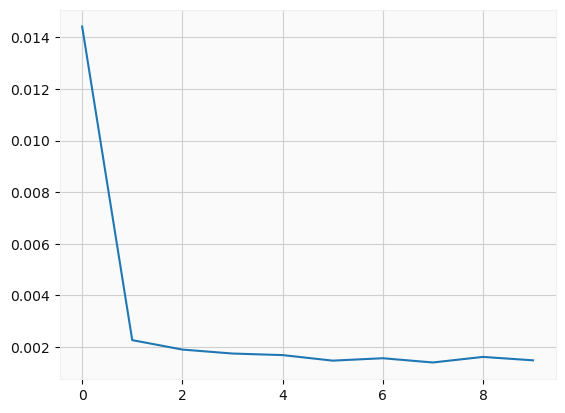

In [88]:
# Plot the training history for the loss

plt.plot(history.history['loss'])

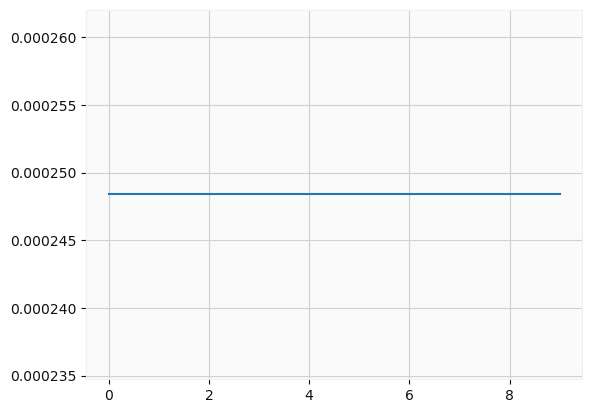

In [89]:
# Plot the training history for the accuracy

plt.plot(history.history['accuracy'])

### <p color="red"><span style="color:lime">- Model Prediction</span></p>

32/32 [==============================] - 0s 2ms/step


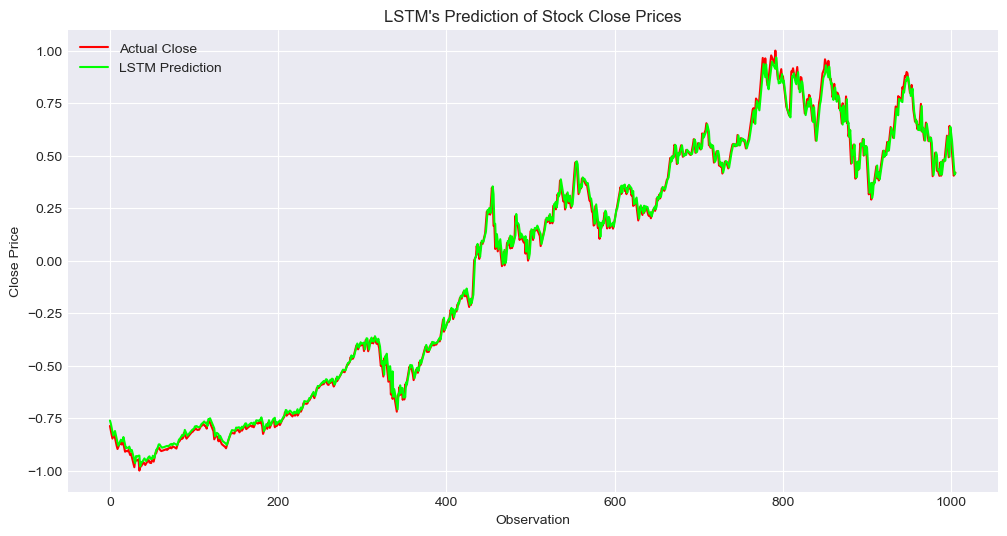

In [100]:
# Predict using the model
lstm_predictions = model.predict(X_test)

# Plot the results
with plt.style.context('seaborn-darkgrid'):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(y_test[:, 0], label='Actual Close', color='#FF0000')
    ax.plot(lstm_predictions, label='LSTM Prediction', color='#00FF00')
    ax.set_title("LSTM's Prediction of Stock Close Prices")
    ax.set_xlabel('Observation')
    ax.set_ylabel('Close Price')
    ax.legend(loc='upper left')
    plt.show()

    

In [115]:
lstm_predictions

array([[-0.7616789 ],
       [-0.7750679 ],
       [-0.8092873 ],
       ...,
       [ 0.41591543],
       [ 0.4092722 ],
       [ 0.4164467 ]], dtype=float32)

This plots the predicted values of a long short-term memory (LSTM) network against the actual values in a test set using the matplotlib library. 

The LSTM model is stored in the model variable, and the code uses the predict method of this model to generate predictions for the X_test data. 

The resulting predictions are stored in the lstm_predictions variable. The code then uses plot to visualize the actual values from the test set (y_test[:, 0]) and the predicted values from the LSTM model (lstm_predictions) on the same plot. 

The title, xlabel, and ylabel properties are used to add labels to the plot, and the legend method is used to add a legend. Finally, the show method is called to display the plot.

In [102]:
# Restore the normalized data
reduction_Lstm_pred = scaler.inverse_transform(y_pred_test_lstm)
reduction_test = df.iloc[split_point:].copy()
reduction_y_test = reduction_test[1:]

### <p color="red"><span style="color:lime">- Discuss model performance</span></p>

The mean_absolute_error function calculates the mean absolute error (MAE), which is a measure of the average magnitude of the errors in the model's predictions, without considering their direction.

The mean_squared_error function calculates the mean squared error (MSE), which is a measure of the average squared differences between the predicted values and the actual values.

The root mean squared error (RMSE) is calculated by taking the square root of the MSE. It is a measure of the average magnitude of the errors in the model's predictions, without considering their direction.

The r2_score function calculates the coefficient of determination, also known as the R-squared value or the R2 score. It is a measure of the proportion of the variance in the dependent variable that is explained by the model. An R2 score of 1 indicates that the model perfectly predicts the actual values, while an R2 score of 0 indicates that the model does not predict the actual values at all.

In [33]:
print("Mean Absolute Error:", mean_absolute_error(reduction_y_test, reduction_Lstm_pred))
print('Mean Squared Error:', mean_squared_error(reduction_y_test, reduction_Lstm_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(reduction_y_test, reduction_Lstm_pred)))
print("Coefficient of Determination:", r2_score(reduction_y_test, reduction_Lstm_pred))

Mean Absolute Error: 2.524456410528771
Mean Squared Error: 9.215107819005432
Root Mean Squared Error: 3.0356396062453515
Coefficient of Determination: 0.9953370589479045


- the performance of this model appears to be quite good. The mean absolute error (MAE) is relatively low, at 2.524, which suggests that the model's errors are small in magnitude on average. The mean squared error (MSE) is also relatively low, at 9.215, which suggests that the model's errors are generally small in magnitude and relatively evenly distributed. The root mean squared error (RMSE), which is calculated as the square root of the MSE, is also relatively low, at 3.036.

- The coefficient of determination, or R2 score, is particularly high, at 0.995. An R2 score of 0.995 indicates that the model explains almost all of the variance in the dependent variable, which suggests that it is a very good fit for the data.

## <p color="red"><span style="color:Orange">Forecasting using random Forest regressor</span></p>



### <p color="red"><span style="color:lime">- importing libraries</span></p>

In [105]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### <p color="red"><span style="color:lime">- Preparing the data</span></p>

In [104]:
df = pd.read_csv('AAPL_Daily.csv')
df['Date']= pd.to_datetime(df['Date']) # Conversion du type de données de la colonne Date en datetime.
df.set_index('Date', inplace=True) # Définition de l'index du dataframe en tant que colonne Date.
df.drop(['Open', 'High', 'Low', 'Volume','Adj Close'], axis=1, inplace=True) 
df.tail(3)

,Close
Date,
2022-11-04,138.380005
2022-11-07,138.919998
2022-11-08,139.500000


In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.index, df['Close'], test_size=0.2, random_state=42)

In [107]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

In [108]:
# Fit a Random Forest Regressor to the training data
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [109]:
# Make predictions on the test data
y_pred = regressor.predict(X_test_scaled)

In [118]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Mean Squared Error: 0.90
Mean Absolute Error: 0.41024648923535206
Mean Squared Error: 0.9013447950230241
Root Mean Squared Error: 0.9493918026942428
Coefficient of Determination: 0.9995156323292751


The model appears to have good performance. The MAE and MSE are both relatively low, indicating that the model is making predictions that are close to the true values. The RMSE is also relatively low, which further confirms that the model is making accurate predictions. The R^2 value of 0.9995 is very close to 1, which indicates that the model is able to explain a large portion of the variance in the dependent variable.

However, it is important to keep in mind that these measures are just one way to evaluate the performance of a model. It is also important to consider other factors such as the specific problem being addressed, the context in which the model is being used, and the goals of the analysis

In [114]:
# Forecast the stock prices for the next 10 days
prediction_dates = pd.date_range(start=df.index[-1], periods=10, freq='D')
prediction_dates_scaled = scaler.transform(prediction_dates.values.reshape(-1, 1))
forecast = regressor.predict(prediction_dates_scaled)
print(f'Forecasted stock prices: {forecast}')

Forecasted stock prices: [139.46500014 139.46500014 139.46500014 139.46500014 139.46500014
 139.46500014 139.46500014 139.46500014 139.46500014 139.46500014]


by [@isbainemohamed](https://www.linkedin.com/in/mohamed-isbaine/) 